In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('matrimony.csv')

In [3]:
df.head()

,Unnamed: 0,YEARS,CHILD,EDUC,MOOD,RELIG
0,1,10.00,0.0,18.0,4.0,3.0
1,2,4.00,0.0,14.0,4.0,4.0
2,3,0.75,0.0,17.0,3.0,2.0
3,4,1.50,0.0,17.0,5.0,2.0
4,5,0.75,0.0,12.0,3.0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  601 non-null    int64  
 1   YEARS       601 non-null    float64
 2   CHILD       601 non-null    float64
 3   EDUC        601 non-null    float64
 4   MOOD        601 non-null    float64
 5   RELIG       601 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 28.3 KB


In [5]:
data = df[['CHILD', 'EDUC', 'MOOD', 'RELIG']]
data

,CHILD,EDUC,MOOD,RELIG
0,0.0,18.0,4.0,3.0
1,0.0,14.0,4.0,4.0
2,0.0,17.0,3.0,2.0
3,0.0,17.0,5.0,2.0
4,0.0,12.0,3.0,2.0
...,...,...,...,...
596,1.0,12.0,5.0,1.0
597,1.0,18.0,4.0,2.0
598,1.0,17.0,5.0,2.0
599,1.0,18.0,2.0,3.0


In [6]:
target = df['YEARS']

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, random_state=2)
print(Xtrain.shape, Xtest.shape)

(450, 4) (151, 4)


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [9]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [10]:
print(lr.intercept_)

1.208538623919651


In [11]:
print(lr.coef_)

[ 6.77959744  0.1546046  -0.65024148  0.71475311]


In [12]:
print('train R^2', lr.score(Xtrain, ytrain))
print('test R^2', lr.score(Xtest, ytest))

train R^2 0.38033241451176636
test R^2 0.34698435567865227


In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

ytest_pred = lr.predict(Xtest)

print("Mean absolute error", mean_absolute_error(ytest, ytest_pred))

Mean absolute error 3.7955001341526864


In [14]:
print("Mean squared error", mean_squared_error(ytest, ytest_pred))

Mean square error 20.27946856524738


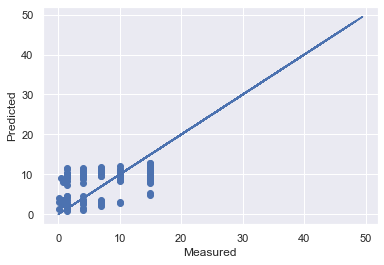

In [15]:
plt.scatter(ytest, ytest_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')

rng = np.random.RandomState(1)
x = 50 * rng.rand(100)
y=x
plt.plot(x, y);

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures() 
tXtrain = poly.fit_transform(Xtrain)
tXtrain.shape

(450, 15)

In [17]:
tXtrain = poly.fit_transform(Xtrain)
tXtest = poly.transform(Xtest)

lr2 = LinearRegression()
lr2.fit(tXtrain, ytrain)

print('train R^2', lr2.score(tXtrain, ytrain))
print('test R^2', lr2.score(tXtest, ytest))

train R^2 0.39976482050873774
test R^2 0.36823462665587026


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

poly = make_pipeline(PolynomialFeatures(), Ridge())
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.3991943654313356
test R^2 0.3766301658953307


In [20]:
from sklearn.linear_model import Lasso

poly = make_pipeline(PolynomialFeatures(2), Lasso())
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.36386113624632443
test R^2 0.3344271120461033


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rfr = RandomForestRegressor(random_state = 2, n_jobs = -1)
rfr.fit(Xtrain, ytrain)
print(rfr.score(Xtrain, ytrain))
print(rfr.score(Xtest, ytest))

0.6019152797534151
0.1610934440219216


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
gbr = GradientBoostingRegressor(random_state = 2)
gbr.fit(Xtrain, ytrain)
print(gbr.score(Xtrain, ytrain))
print(gbr.score(Xtest, ytest))

0.5004677999643334
0.3151308961988396
